In [1]:
import json
from pathlib import Path

import pandas as pd
from tabulate import tabulate

RESULTS_PATH = Path("../results")

In [2]:
def load_points_out_of_bounds(level: str, model_name: str) -> dict | None:
    """Loads the points_out_of_bounds.json file of a model."""
    file_path = RESULTS_PATH / level / model_name / "points_out_of_bounds.json"
    if file_path.exists():
        with open(file_path) as f:
            return json.load(f)
    return None


def load_potential_problems(level: str, model_name: str) -> dict | None:
    """Loads the potential_problems.json file of a model."""
    file_path = RESULTS_PATH / level / model_name / "potential_problems.json"
    if file_path.exists():
        with open(file_path) as f:
            return json.load(f)
    return None

In [3]:
def list_models(level: str) -> list[str]:
    """Lists all models in a level (club_level or player_level)."""
    level_path = RESULTS_PATH / level
    if not level_path.exists():
        return []
    return [d.name for d in level_path.iterdir() if d.is_dir()]


club_models = sorted(list_models("club_level"))
player_models = sorted(list_models("player_level"))

print(f"Club-level models:\n{club_models}")
print(f"Player-level models:\n{player_models}")

Club-level models:
['bradley_terry_1', 'bradley_terry_2', 'bradley_terry_3', 'bradley_terry_4', 'poisson_1', 'poisson_10', 'poisson_2', 'poisson_3', 'poisson_4', 'poisson_5', 'poisson_6', 'poisson_7', 'poisson_8', 'poisson_9']
Player-level models:
['poisson_1', 'poisson_2', 'poisson_3', 'poisson_4', 'poisson_6', 'poisson_7', 'poisson_8', 'poisson_9']


In [4]:
def analyze_points_out_of_bounds(level: str, models: list[str]) -> pd.DataFrame:
    """Analyses how many parameters have points out of bounds."""
    results = []

    for model_name in models:
        data = load_points_out_of_bounds(level, model_name)
        if data is None:
            results.append(
                {
                    "model": model_name,
                    "level": level,
                    "diff_plot_total_params": None,
                    "diff_plot_flagged": None,
                    "regular_plot_total_params": None,
                    "regular_plot_flagged": None,
                }
            )
            continue

        diff_plot = data.get("diff_plot", {})
        diff_total = len(diff_plot)
        diff_flagged = sum(1 for v in diff_plot.values() if v > 0)
        diff_total_points = sum(diff_plot.values())

        regular_plot = data.get("regular_plot", {})
        regular_total = len(regular_plot)
        regular_flagged = sum(1 for v in regular_plot.values() if v > 0)
        regular_total_points = sum(regular_plot.values())

        results.append(
            {
                "model": model_name,
                "level": level,
                "diff_plot_total_params": diff_total,
                "diff_plot_flagged": diff_flagged,
                "diff_plot_total_points_out": diff_total_points,
                "regular_plot_total_params": regular_total,
                "regular_plot_flagged": regular_flagged,
                "regular_plot_total_points_out": regular_total_points,
            }
        )

    return pd.DataFrame(results).sort_values(by="model", ignore_index=True)

In [5]:
club_analysis = analyze_points_out_of_bounds("club_level", club_models)
club_analysis

,model,level,diff_plot_total_params,diff_plot_flagged,diff_plot_total_points_out,regular_plot_total_params,regular_plot_flagged,regular_plot_total_points_out
0,bradley_terry_1,club_level,20,1,2,20,0,0
1,bradley_terry_2,club_level,21,0,0,21,0,0
2,bradley_terry_3,club_level,21,0,0,21,0,0
3,bradley_terry_4,club_level,22,0,0,22,0,0
4,poisson_1,club_level,20,0,0,20,0,0
5,poisson_10,club_level,81,1,2,81,0,0
6,poisson_2,club_level,21,0,0,21,0,0
7,poisson_3,club_level,40,1,2,40,0,0
8,poisson_4,club_level,41,0,0,41,0,0
9,poisson_5,club_level,80,0,0,80,0,0


In [6]:
player_analysis = analyze_points_out_of_bounds("player_level", player_models)
player_analysis

,model,level,diff_plot_total_params,diff_plot_flagged,diff_plot_total_points_out,regular_plot_total_params,regular_plot_flagged,regular_plot_total_points_out
0,poisson_1,player_level,732,3,6,732,0,0
1,poisson_2,player_level,733,5,10,733,0,0
2,poisson_3,player_level,1464,6,14,1464,0,0
3,poisson_4,player_level,1465,8,16,1465,0,0
4,poisson_6,player_level,733,4,8,733,0,0
5,poisson_7,player_level,734,4,8,734,0,0
6,poisson_8,player_level,1465,8,16,1465,0,0
7,poisson_9,player_level,1466,10,20,1466,1,2


In [7]:
all_analysis = pd.concat([club_analysis, player_analysis], ignore_index=True)

print("=" * 60)
print("SUMMARY: Parameters with points out of bounds (diff_plot)")
print("=" * 60)

for _, row in all_analysis.iterrows():
    if row["diff_plot_total_params"] is not None:
        flagged = row["diff_plot_flagged"]
        total = row["diff_plot_total_params"]
        total_points = row["diff_plot_total_points_out"]
        print(
            f"{row['level']}/{row['model']}: {flagged}/{total} parameters flagged",
            f" ({total_points} points out of bounds in total)",
        )
    else:
        print(f"{row['level']}/{row['model']}: file not found")

SUMMARY: Parameters with points out of bounds (diff_plot)
club_level/bradley_terry_1: 1/20 parameters flagged  (2 points out of bounds in total)
club_level/bradley_terry_2: 0/21 parameters flagged  (0 points out of bounds in total)
club_level/bradley_terry_3: 0/21 parameters flagged  (0 points out of bounds in total)
club_level/bradley_terry_4: 0/22 parameters flagged  (0 points out of bounds in total)
club_level/poisson_1: 0/20 parameters flagged  (0 points out of bounds in total)
club_level/poisson_10: 1/81 parameters flagged  (2 points out of bounds in total)
club_level/poisson_2: 0/21 parameters flagged  (0 points out of bounds in total)
club_level/poisson_3: 1/40 parameters flagged  (2 points out of bounds in total)
club_level/poisson_4: 0/41 parameters flagged  (0 points out of bounds in total)
club_level/poisson_5: 0/80 parameters flagged  (0 points out of bounds in total)
club_level/poisson_6: 1/21 parameters flagged  (2 points out of bounds in total)
club_level/poisson_7: 0/22

In [8]:
def analyze_convergence_problems(level: str, models: list[str]) -> pd.DataFrame:
    """Analyses convergence problems in simulations."""
    results = []

    for model_name in models:
        data = load_potential_problems(level, model_name)
        if data is None:
            results.append(
                {
                    "model": model_name,
                    "level": level,
                    "total_simulations": None,
                    "sims_with_rhat_issues": None,
                    "sims_with_divergences": None,
                    "sims_with_low_ebfmi": None,
                    "sims_with_treedepth": None,
                }
            )
            continue

        total_sims = len(data)
        rhat_issues = 0
        divergences = 0
        low_ebfmi = 0
        treedepth = 0

        for _, message in data.items():
            if "R-hat greater than 1.01" in message:
                rhat_issues += 1
            if "transitions ended with a divergence" in message:
                divergences += 1
            if "E-BFMI" in message and "below" in message:
                low_ebfmi += 1
            if "hit the maximum treedepth" in message:
                treedepth += 1

        results.append(
            {
                "model": model_name,
                "level": level,
                "total_simulations": total_sims,
                "sims_with_rhat_issues": rhat_issues,
                "sims_with_divergences": divergences,
                "sims_with_low_ebfmi": low_ebfmi,
                "sims_with_treedepth": treedepth,
            }
        )

    return pd.DataFrame(results).sort_values(by="model", ignore_index=True)

In [9]:
club_convergence = analyze_convergence_problems("club_level", club_models)

print("Convergence problems - Club models:")
display(club_convergence)

Convergence problems - Club models:


,model,level,total_simulations,sims_with_rhat_issues,sims_with_divergences,sims_with_low_ebfmi,sims_with_treedepth
0,bradley_terry_1,club_level,10,10,0,0,0
1,bradley_terry_2,club_level,10,10,0,0,0
2,bradley_terry_3,club_level,10,10,0,0,0
3,bradley_terry_4,club_level,10,10,0,0,0
4,poisson_1,club_level,10,9,1,2,0
5,poisson_10,club_level,205,89,0,2,186
6,poisson_2,club_level,10,9,2,1,0
7,poisson_3,club_level,134,50,0,2,124
8,poisson_4,club_level,128,51,0,3,116
9,poisson_5,club_level,223,102,1,3,209


In [10]:
player_convergence = analyze_convergence_problems("player_level", player_models)

print("Convergence problems - Player models:")
display(player_convergence)

Convergence problems - Player models:


,model,level,total_simulations,sims_with_rhat_issues,sims_with_divergences,sims_with_low_ebfmi,sims_with_treedepth
0,poisson_1,player_level,28,20,8,18,3
1,poisson_2,player_level,44,25,21,24,7
2,poisson_3,player_level,119,28,3,5,119
3,poisson_4,player_level,125,32,2,5,124
4,poisson_6,player_level,37,20,16,23,3
5,poisson_7,player_level,32,23,8,22,4
6,poisson_8,player_level,125,32,1,5,124
7,poisson_9,player_level,128,33,5,6,125


In [11]:
def generate_latex_table(analysis_df: pd.DataFrame) -> str:
    """Generates LaTeX table using tabulate."""
    # Only keep rows where diff_plot_total_params is not None
    filtered = analysis_df[analysis_df["diff_plot_total_params"].notna()]

    table_data = []
    for _, row in filtered.iterrows():
        model = row["model"].replace("_", r"\_")
        total = int(row["diff_plot_total_params"])
        flagged_diff = int(row["diff_plot_flagged"])
        flagged_reg = int(row["regular_plot_flagged"])
        points_out = int(row["diff_plot_total_points_out"])
        table_data.append([model, total, flagged_diff, flagged_reg, points_out])

    headers = [
        "Model",
        "Total Params",
        "Flagged (diff)",
        "Flagged (regular)",
        "Total Points Out",
    ]

    latex_body = tabulate(
        table_data, headers=headers, tablefmt="latex_raw", floatfmt="d"
    )

    # Add caption and table environment
    return (
        "\\begin{table}[htbp]\n"
        "    \\centering\n"
        f"{latex_body}\n"
        "    \\caption{SBC validation results.}\n"
        "\\end{table}"
    )


print("LaTeX table - Club models:")
print(generate_latex_table(club_analysis))

LaTeX table - Club models:
\begin{table}[htbp]
    \centering
\begin{tabular}{lrrrr}
\hline
 Model             &   Total Params &   Flagged (diff) &   Flagged (regular) &   Total Points Out \\
\hline
 bradley\_terry\_1 &             20 &                1 &                   0 &                  2 \\
 bradley\_terry\_2 &             21 &                0 &                   0 &                  0 \\
 bradley\_terry\_3 &             21 &                0 &                   0 &                  0 \\
 bradley\_terry\_4 &             22 &                0 &                   0 &                  0 \\
 poisson\_1        &             20 &                0 &                   0 &                  0 \\
 poisson\_10       &             81 &                1 &                   0 &                  2 \\
 poisson\_2        &             21 &                0 &                   0 &                  0 \\
 poisson\_3        &             40 &                1 &                   0 &               

In [12]:
def get_flagged_params_details(level: str, model_name: str) -> dict:
    """Returns details of parameters that have points out of bounds."""
    data = load_points_out_of_bounds(level, model_name)
    if data is None:
        return {}

    flagged = {}
    for plot_type in ["diff_plot", "regular_plot"]:
        plot_data = data.get(plot_type, {})
        flagged[plot_type] = {k: v for k, v in plot_data.items() if v > 0}

    return flagged

In [13]:
for model in club_models:
    flagged = get_flagged_params_details("club_level", model)
    if flagged.get("diff_plot"):
        print(f"\n{model} - Parameters with points out of bounds (diff_plot):")
        for param, count in flagged["diff_plot"].items():
            print(f"  {param}: {count} points")


bradley_terry_1 - Parameters with points out of bounds (diff_plot):
  log_skills.4: 2 points

poisson_10 - Parameters with points out of bounds (diff_plot):
  beta.19: 2 points

poisson_3 - Parameters with points out of bounds (diff_plot):
  alpha.3: 2 points

poisson_6 - Parameters with points out of bounds (diff_plot):
  alpha.1: 2 points


In [14]:
for model in player_models:
    flagged = get_flagged_params_details("player_level", model)
    if flagged.get("diff_plot"):
        print(f"\n{model} - Parameters with points out of bounds (diff_plot):")
        for param, count in flagged["diff_plot"].items():
            print(f"  {param}: {count} points")


poisson_1 - Parameters with points out of bounds (diff_plot):
  alpha.88: 2 points
  alpha.485: 2 points
  alpha.685: 2 points

poisson_2 - Parameters with points out of bounds (diff_plot):
  alpha.88: 2 points
  alpha.174: 2 points
  alpha.377: 2 points
  alpha.405: 2 points
  alpha.485: 2 points

poisson_3 - Parameters with points out of bounds (diff_plot):
  alpha.349: 2 points
  alpha.485: 4 points
  alpha.579: 2 points
  beta.114: 2 points
  beta.137: 2 points
  beta.633: 2 points

poisson_4 - Parameters with points out of bounds (diff_plot):
  alpha.88: 2 points
  alpha.120: 2 points
  alpha.138: 2 points
  alpha.395: 2 points
  alpha.405: 2 points
  beta.261: 2 points
  beta.384: 2 points
  beta.554: 2 points

poisson_6 - Parameters with points out of bounds (diff_plot):
  alpha.485: 2 points
  alpha.534: 2 points
  alpha.579: 2 points
  alpha.685: 2 points

poisson_7 - Parameters with points out of bounds (diff_plot):
  alpha.267: 2 points
  alpha.485: 2 points
  alpha.534: 2 

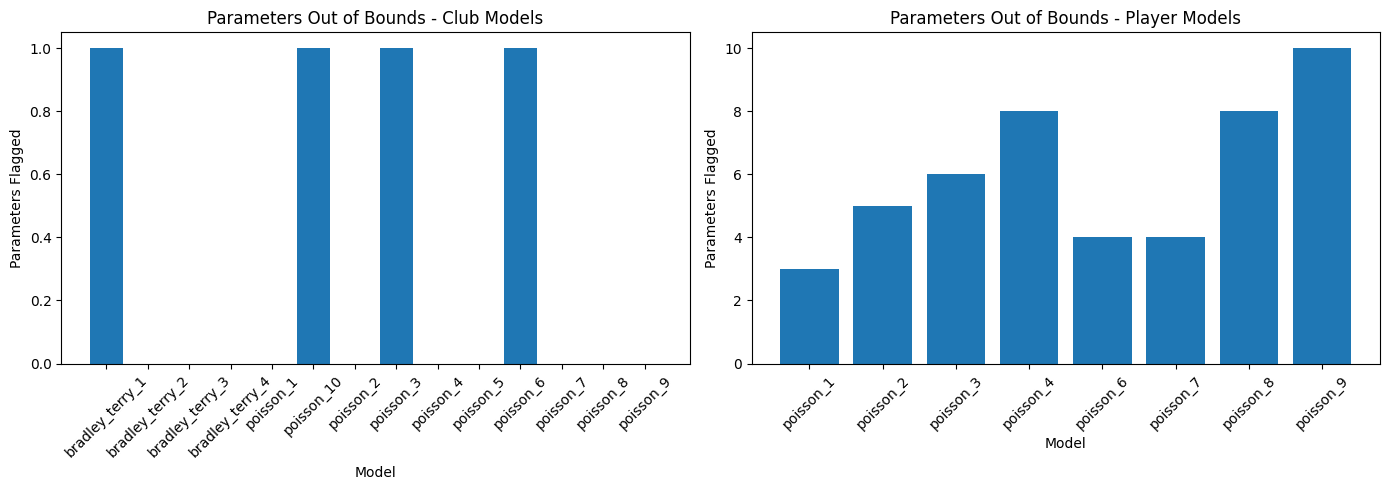

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
club_analysis_valid = club_analysis[club_analysis["diff_plot_total_params"].notna()]
ax1.bar(club_analysis_valid["model"], club_analysis_valid["diff_plot_flagged"])
ax1.set_xlabel("Model")
ax1.set_ylabel("Parameters Flagged")
ax1.set_title("Parameters Out of Bounds - Club Models")
ax1.tick_params(axis="x", rotation=45)

ax2 = axes[1]
player_analysis_valid = player_analysis[
    player_analysis["diff_plot_total_params"].notna()
]
ax2.bar(player_analysis_valid["model"], player_analysis_valid["diff_plot_flagged"])
ax2.set_xlabel("Model")
ax2.set_ylabel("Parameters Flagged")
ax2.set_title("Parameters Out of Bounds - Player Models")
ax2.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [16]:
print("=" * 60)
print("FINAL STATISTICS")
print("=" * 60)

# Club level
club_valid = club_analysis[club_analysis["diff_plot_total_params"].notna()]
total_club_params = club_valid["diff_plot_total_params"].sum()
total_club_flagged = club_valid["diff_plot_flagged"].sum()
print("\nClub models:")
print(f"  Total of parameters analyzed: {total_club_params}")
print(f"  Total of flagged parameters: {total_club_flagged}")
print(f"  Percentage flagged: {100 * total_club_flagged / total_club_params:.2f}%")

# Player level
player_valid = player_analysis[player_analysis["diff_plot_total_params"].notna()]
total_player_params = player_valid["diff_plot_total_params"].sum()
total_player_flagged = player_valid["diff_plot_flagged"].sum()
print("\nPlayer models:")
print(f"  Total of parameters analyzed: {total_player_params}")
print(f"  Total of flagged parameters: {total_player_flagged}")
print(f"  Percentage flagged: {100 * total_player_flagged / total_player_params:.2f}%")

FINAL STATISTICS

Club models:
  Total of parameters analyzed: 493
  Total of flagged parameters: 4
  Percentage flagged: 0.81%

Player models:
  Total of parameters analyzed: 8792
  Total of flagged parameters: 48
  Percentage flagged: 0.55%
